<a href="https://colab.research.google.com/github/vdnew/Sentiment-Analysis-on-tweet/blob/main/Narendra_Modi_Sentiment_Analysis_100_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
from tweepy import OAuthHandler

In [ ]:
consumer_api_key = 'XXX'
consumer_api_secret = 'XXX' 
access_token = 'XXX'
access_token_secret ='XXX'

In [ ]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(authorizer ,timeout=15)

In [ ]:
twitterAccount = "narendramodi"

In [ ]:
tweets = tweepy.Cursor(api.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(100);

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [ ]:
df.head()

,Tweet
0,Centenary celebrations of Chauri Chaura incide...
1,Glad to see your affection towards India. :)\n...
2,The incident at Chauri Chaura has a special pl...
3,RT @MEAIndia: #IndiaTogether \n#IndiaAgainstPr...
4,India offers unlimited potential in defence an...


In [ ]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [ ]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [ ]:
df.head()

,Tweet
0,Centenary celebrations of Chauri Chaura incide...
1,Glad to see your affection towards India. :)\n...
2,The incident at Chauri Chaura has a special pl...
3,IndiaTogether \nIndiaAgainstPropaganda \n\n
4,India offers unlimited potential in defence an...


In [ ]:


def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity



In [ ]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [ ]:
df.head()

,Tweet,Subjectivity,Polarity
0,Centenary celebrations of Chauri Chaura incide...,0.000000,0.000000
1,Glad to see your affection towards India. :)\n...,1.000000,0.500000
2,The incident at Chauri Chaura has a special pl...,0.571429,0.357143
3,IndiaTogether \nIndiaAgainstPropaganda \n\n,0.000000,0.000000
4,India offers unlimited potential in defence an...,0.666667,0.366667


In [ ]:
df = df.drop(df[df['Tweet'] == ''].index)

In [ ]:


# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"



In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head()

,Tweet,Subjectivity,Polarity,Score
0,Centenary celebrations of Chauri Chaura incide...,0.000000,0.000000,Neutral
1,Glad to see your affection towards India. :)\n...,1.000000,0.500000,Positive
2,The incident at Chauri Chaura has a special pl...,0.571429,0.357143,Positive
3,IndiaTogether \nIndiaAgainstPropaganda \n\n,0.000000,0.000000,Neutral
4,India offers unlimited potential in defence an...,0.666667,0.366667,Positive


<BarContainer object of 3 artists>

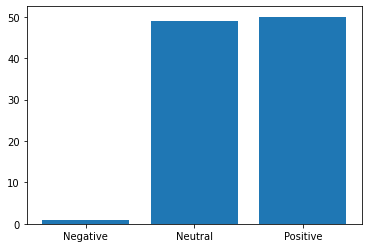

In [ ]:
import matplotlib.pyplot as plt

labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

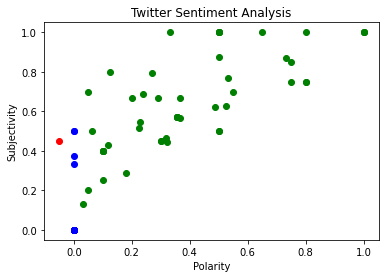

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [ ]:


objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")



45.0 % of objective tweets


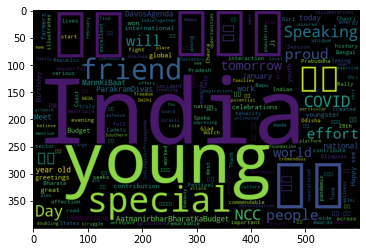

In [ ]:
from wordcloud import WordCloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()